In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (14,7)

Contrôle de spin sur la sphère
==============================


On s'intéresse au contrôle de l'orientation d'un spin dans un champ magnétique, problème que l'on rencontre dans diverses applications comme l'imagerie médicale (IRM) ou l'ordinateur quantique. 
Un spin (ou qubit en informatique quantique) peut se représenter par un vecteur $\psi \in  \mathbb{R}^3$ de la sphère (*sphère de Bloch*)
$$
S^2= \{ (x,y,z)\in \mathbb{R}^3 \mid x^2+y^2+z^2=1 \} 
$$
et on cherche à simuler son comportement lorsqu'il est placé dans un champ magnétique externe. Plus particulièrement, on voudrait simuler un *transfert de population*, c'est à dire un choix de champ magnétique permettant de faire passer une population de $p$ spins de la position initiale $-e_z = (0,0,-1)$ à la position finale $e_z=(0,0,1)$ en un temps $T$ donné. Les spins n'ayant pas tous exactement les mêmes propriétés de couplage avec le champ magnétique ambiant, il faut que ce transfert soit *robuste*, c'est-à-dire les amenant tous au voisinage de la cible malgré leur hétérogénéité.

Notre système dynamique est donc composé de $p$ sous-systèmes indépendants $(\psi_1,\ldots,\psi_i,\ldots,\psi_p)$, chacun évoluant selon
$$ 
\dot\psi_i = r_i(t) \wedge \psi_i, \qquad \psi_i(0)\in S^2 \tag{1}, \qquad i\in\{1,\ldots, p \}
$$
où $\psi_i\in \mathbb{R}^3$ décrit l'orientation du spin $i$, $r_i(t)\in \mathbb{R}^3$ est le champ magnétique externe ``vu'' par le spin $i$ au temps $t$, et $\wedge$ dénote le produit vectoriel. 

En pratique, on est souvent dans la situation suivante : un champ magnétique $E$ intense selon l'axe $Oz$ fixe, et un champ contrôlable $u(t)$, à choisir, selon l'axe $Ox$. Selon les propriétés de couplage magnétique de chaque spin, chaque spin reçoit alors le champ magnétique
$$
r_i(t)=(\delta_i u(t),0,E_i)
$$ 
avec $E_i\in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min},\delta_{\max}]$, pour des paramètres $E, \alpha, \delta_{\min},\delta_{\max}$ décrivant l'hétérogénité du système.

Les paramètres $E_i$ et $\delta_i$ de chaque spin étant inconnus, on cherche alors à effectuer un transfert de population *robuste*, c'est-à-dire assurant que tous les spins atteignent une orientation très proche de la cible $e_z$ malgré les incertitudes sur $E_i$ et $\delta_i$ et se basant seulement sur la connaissance de leurs intervalles.


## Simulation du transfert d'un spin sur la sphère

**Question 1** 

**1a** Justifier que toute solution du problème de Cauchy 
$$ 
\dot\psi = r(t) \wedge \psi, \qquad \psi(0)\in S^2 
$$
reste sur la sphère $S^2$ en tous temps. 

→ Soit $\psi$ une solution au problème de Cauchy considéré. 
Montrons que $\psi$ reste sur la sphère $S^2$ en tous temps. 

Posons la fonction du temps  $g : \mathbb{R} \to \mathbb{R}^+ $, définie sur $\mathbb{R}$ par  $t \mapsto \| \psi(t) \|^2 = \langle \psi(t), \psi(t) \rangle$,  où $\langle \cdot,\cdot \rangle$ est le produit scalaire canonique sur $\mathbb{R}^3$.

Le produit scalaire est une application bilinéaire donc de classe $C^\infty$. D'autre part $\psi$ est dérivable. Donc par composition, $g$ est dérivable sur $\mathbb{R}$, et on a, en utilisant le caractère symétrique du produit scalaire, pour tout $t \in \mathbb{R}$ : 
$$
\dot{g}(t) = \langle \dot{\psi}(t), \psi(t) \rangle + \langle \psi(t), \dot{\psi}(t) \rangle = 2 \langle \dot{\psi}(t), \psi(t) \rangle
$$
Donc pour tout $t \in \mathbb{R}$ : $\dot{g}(t) = 2 \langle r(t) \wedge \psi(t), \psi(t) \rangle = 0$

Car pour tous vecteurs $u,v \in \mathbb{R}^3$, on a $\langle a \wedge b, b \rangle = 0$, car $a \wedge b$ est par définition orthogonal à $b$.

Donc, sachant $\psi(0)\in S^2$, on a pour tout $t \in \mathbb{R}$ : $g(t) = g(0) = \| \psi(t) \|^2 =  1$

Donc pour tout $t \in \mathbb{R}$ : $\| \psi(t) \|^2 = 1$

Donc $\psi$ reste sur la sphère $S^2$ en tous temps. 

On introduit les matrices anti-symétriques suivantes
$$\Omega_x=\left(\begin{matrix}
0& 0 &0 \\
0& 0 &-1 \\
0& 1 &0 \\
\end{matrix}\right), \qquad \Omega_y=\left(\begin{matrix}
0& 0 &1 \\
0& 0 &0 \\
-1& 0 &0 \\
\end{matrix}\right), \qquad
\Omega_z=\left(\begin{matrix}
0& -1 &0 \\
1& 0 & 0 \\
0& 0 &0 \\
\end{matrix}\right). $$

**1b** Vérifier que pour tout $(r_x,r_y,r_z)\in \mathbb{R}^3$ et $\psi \in \mathbb{R}^3$, 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$
c'est-à-dire que $\Omega_x$ (resp. $\Omega_y,\Omega_z$)  est la représentation matricielle de l'application linéaire $\psi \mapsto e_x \wedge \psi$ (resp. $\psi \mapsto e_y \wedge \psi$, $\psi \mapsto e_z \wedge \psi$).

L'équation $(1)$ se réécrit donc 
$$
\dot\psi_i= (E_i \Omega_z+ \delta_i u(t) \Omega_x )\psi_i, \qquad \psi_i(0)\in S^2 \tag{2}
$$
c'est-à-dire sous forme d'une équation différentielle linéaire, décrite par une matrice $E_i \Omega_z+ \delta_i u(t) \Omega_x$ dépendant du temps.

→ En notant
$\psi = \begin{pmatrix} \psi_x \\ \psi_y \\ \psi_z \end{pmatrix} \in \mathbb{R}^3$, on calcule simplement les produits vectoriels, et on obtient :
$\\e_x \wedge \psi = -\psi_z e_y + \psi_y e_z = \Omega_x \psi$

$\
e_y \wedge \psi = \psi_z e_x - \psi_x e_z = \Omega_y \psi$

$\
e_z \wedge \psi = -\psi_y e_x + \psi_x e_y = \Omega_z \psi$

d'où le résultat souhaité : pour tout $(r_x,r_y,r_z)\in \mathbb{R}^3$ et $\psi \in \mathbb{R}^3$, 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$

**Question 2** On cherche à simuler l'équation (2) numériquement, d'abord dans le cas où il y a un seul spin et sans incertitude, c'est-à-dire 
$$
\dot\psi= (E \Omega_z+ \delta u(t) \Omega_x )\psi, \qquad \psi(0)=-e_z \tag{3}
$$
avec $T=50$, $E=2$, $\delta=1$ et la commande 
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ \frac{\sin(\pi t/T)}{\pi/T}\right) 
$$

**2a** Coder un schéma Euler explicite résolvant l'équation différentielle (3). Tracer l'évolution de la norme de $\psi$. Interpréter.

**2b** Même question avec un schéma Euler implicite.

**2c** Proposer et coder un schéma qui reprojette l'état sur la sphère à chaque pas de temps. Comparer. Tracer la loi de contrôle $t\mapsto u(t)$ et la trajectoire du spin $t\mapsto \psi(t)$ en 3D. Commenter.

In [14]:
E=2
delta=1 
T=50
u = lambda t: (1-np.cos(2*np.pi*t/T))*np.cos(E*t+ np.sin(np.pi*t/T)/(np.pi/T))
psi_0=np.array([0,0,-1])
dt=1e-3
Omega_x=np.array([[0,0,0],[0,0,-1],[0,1,0]])
Omega_z=np.array([[0,-1,0],[1,0,0],[0,0,0]])
t_0=0.000001
t_f=20

def f(x,t,E,delta):
    return(np.dot(E*Omega_z+delta*u(t)*Omega_x,np.transpose(x)))


**2a →**  

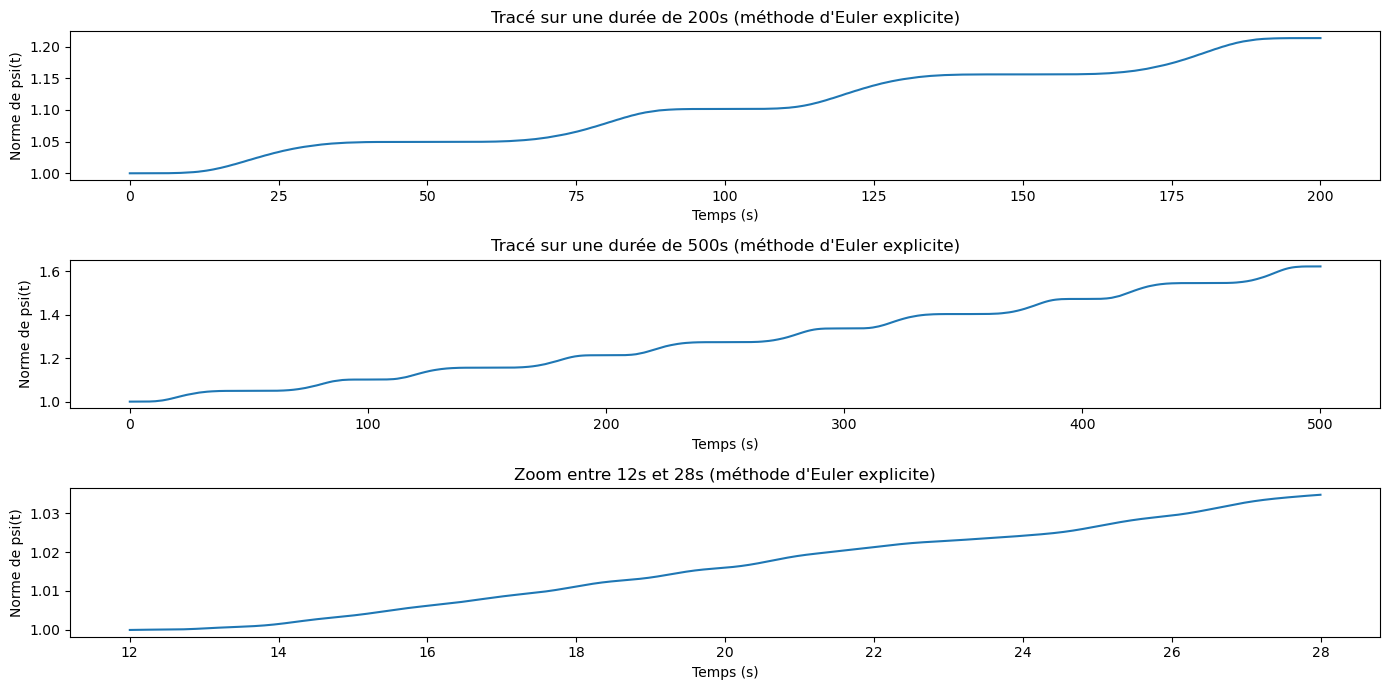

In [15]:
def euler_explicit(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi[k] = f(psi[k-1],tps[k-1],E,delta)*dt+psi[k-1]
    return(tps,psi)

Résolution_exp_a = euler_explicit(psi_0,0.000001,200,E,delta,dt)
Temps_exp_a = Résolution_exp_a[0]
Norme_psi_exp_a = np.linalg.norm(Résolution_exp_a[1],ord=2,axis=1)

Résolution_exp_b = euler_explicit(psi_0,0.000001,500,E,delta,dt)
Temps_exp_b = Résolution_exp_b[0]
Norme_psi_exp_b = np.linalg.norm(Résolution_exp_b[1],ord=2,axis=1)

Résolution_exp_c = euler_explicit(psi_0,12,28,E,delta,dt)
Temps_exp_c = Résolution_exp_c[0]
Norme_psi_exp_c = np.linalg.norm(Résolution_exp_c[1],ord=2,axis=1)

plt.figure()

plt.subplot(3, 1, 1)
plt.plot(Temps_exp_a,Norme_psi_exp_a)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 200s (méthode d'Euler explicite)")

plt.subplot(3, 1, 2)
plt.plot(Temps_exp_b,Norme_psi_exp_b)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 500s (méthode d'Euler explicite)")

plt.subplot(3, 1, 3)
plt.plot(Temps_exp_c,Norme_psi_exp_c)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Zoom entre 12s et 28s (méthode d'Euler explicite)")

plt.tight_layout()
plt.show()

On observe que la norme de $\psi$ est croit avec le temps. Ceci prouve que la simulation numérique par la méthode explicite n'est pas satisfaisante, puisque la théorie a prouvé qu'elle reste constante égale à 1.

**2b →**  

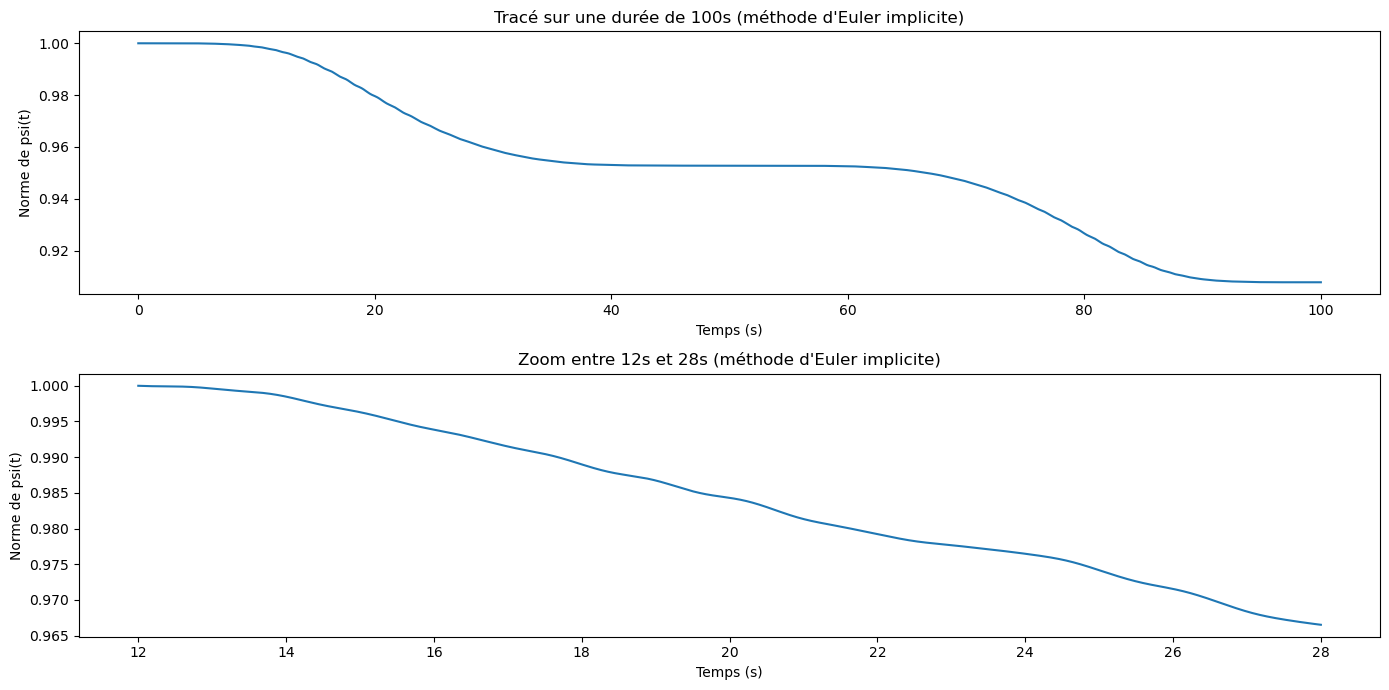

In [16]:
def g(x,t,E,delta):
    return(np.dot(np.linalg.inv(np.identity(3) - dt*(E*Omega_z+delta*u(t+dt)*Omega_x)),np.transpose(x)))

def euler_implicit(psi_0,t_0,t_f,E,delta,dt):
    tps = np.arange(t_0,t_f,dt)
    n = len(tps)
    psi = np.zeros((n,3))
    psi[0] = psi_0
    for k in range(1,n):
        psi[k] = g(psi[k-1],tps[k-1],E,delta)
    return(tps,psi)

Résolution_imp_a = euler_implicit(psi_0,0.000001,100,E,delta,dt)
Temps_imp_a = Résolution_imp_a[0]
Norme_psi_imp_a = np.linalg.norm(Résolution_imp_a[1],ord=2,axis=1)

Résolution_imp_c = euler_implicit(psi_0,12,28,E,delta,dt)
Temps_imp_c = Résolution_imp_c[0]
Norme_psi_imp_c = np.linalg.norm(Résolution_imp_c[1],ord=2,axis=1)

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(Temps_imp_a,Norme_psi_imp_a)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Tracé sur une durée de 100s (méthode d'Euler implicite)")

plt.subplot(2, 1, 2)
plt.plot(Temps_imp_c,Norme_psi_imp_c)
plt.xlabel("Temps (s)")
plt.ylabel("Norme de psi(t)")
plt.title("Zoom entre 12s et 28s (méthode d'Euler implicite)")

plt.tight_layout()
plt.show()

On observe ici le phénomène inverse : la norme de $\psi$ est décroit avec le temps. Ceci prouve que la simulation numérique par la méthode implicite n'est pas non plus satisfaisante, puisque la théorie a prouvé qu'elle reste constante égale à 1.

**2c →**  

On observe que la norme de $\psi$ est bien constante égale à 1 au cours du temps, ce qui est cohérent avec la reprojection de l'état sur la sphère à chaque pas de temps.

Le spin semble tourbilllonner pour se stabiliser en $\ +e_z/-e_z$. Ces autres traçés soulignent ce résultat :

Entre [0,T] (où T= 50) la loi de contrôle permet bien de faire la transition de spin $\ -e_z$ vers $\ +e_z$ (elle fait tourbilloner le spin jusqu'a atteindre $\ +e_z$.


**Vocabulaire // ouverture mathématique**

$S^2$ est une surface dans $\mathbb{R}^3$, c'est un cas particulier de **variété différentielle**. L'équation (2) assure que si $\psi$ appartient à la variété, $\dot \psi$ appartient au **plan tangent** en $\psi$ de $S^2$ et donc que $S^2$ est invariant par la dynamique. Pour des simulations en temps long sur des variétés il est souvent important de s'assurer que la dynamique discrete (celle du schéma numérique) reste exactement sur la variété (et non approximativement)


## Robustesse et simulation du transfert d'un ensemble de spins

On considère maintenant un ensemble de $p$ spins évoluant chacun selon (2) mais avec différentes valeurs de $E_i \in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min}, \delta_{\max}]$. On souhaite vérifier que le même contrôle $u$ fonctionne sur tous simultanément, c'est-à-dire évaluer sa robustesse.

**Question 3**

Simuler $p=10$ spins avec la méthode retenue ci-dessus, en faisant varier $E_i$ puis $\delta_i$. Vérifier que pour $\alpha = 0.5$, $\delta_{\min}= 0.4$ et $\delta_{\max}= 3.5$, la même loi de contrôle $u$ assure tout de même la transition de $-e_z$ à $e_z$ avec une excellente précision à évaluer.

La même loi de controle parvient bien à transférer tous les spins avec une précision satisfaisante, de distance euclidienne de 0.1 en moyenne au vecteur $\ e_z$.


**Vocabulaire // ouverture mathématique et physique**

Pour obtenir ce contrôle robuste, on utilise le théorème adiabatique ainsi qu'une approximation de l'onde tournante. On règle par exemple la bande de fréquence à parcourir en fonction de $\alpha$ en prenant
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ 2\alpha\frac{\sin(\pi t/T)}{\pi/T}\right) 
$$
On pourra se référer à cet [article](https://www.sciencedirect.com/science/article/pii/S0022039622001401?via%3Dihub).


## Simulation de l'opérateur de flot

Pour améliorer l'efficacité de la simulation numérique, on souhaite pouvoir utiliser plusieurs processeurs en parallèle. Pour cela, il est possible d'exploiter le caractère linéaire de l'équation différentielle et de calculer plutôt son opérateur de flot, c'est à dire à l'application $\psi_0 \mapsto \psi(T)$ permettant de passer de la condition initiale à la solution de l'équation (3) au temps $T$. L'équation (3) étant linéaire, le flot de l'équation est une application linéaire, représentée par une matrice $U(T)\in \mathbb{R}^{3\times 3}$ ici en dimension finie, obtenue en résolvant l'équation différentielle suivante :

$$\dot U = (E \Omega_z+\delta u(t) \Omega_x ) U , \qquad U(0)= I_3 \tag{4}$$

où $I_3$ dénote la matrice identité de dimension 3. On notera bien que $U(t)$ est une matrice réelle $3\times 3$.

---
**Vocabulaire // ouverture mathématique**


L'application linéaire $U(t)$ s'appelle **matrice de transition** entre les temps 0 et $t$ en dimension finie, et plus généralement **propagateur** en mécanique quantique, et **semigroupe** dans le cadre des équations aux dérivées partielles.

---

**Question 4** On cherche à résoudre numériquement l'équation (4).

**4a** Vérifier que la connaissance de $U(t)$ permet de résoudre directement l'équation (3) car $\psi(t) = U(t) \psi_0$ pour tout $t\in [0,T]$.

**4b** Prouver que pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$ et justifier que le determinant de $U$ reste égal à 1. 

On en déduit que $U(t)$ reste en tout temps une matrice de rotation. On rappelle que $SO_3$ dénote l'ensemble des matrices de rotation de dimension 3.

**4c** (BONUS) Proposer une méthode de projection sur $SO_3$ et implémenter un schéma Euler avec cette projection. Indication : regarder [ici](https://en.wikipedia.org/wiki/Singular_value_decomposition#Nearest_orthogonal_matrix).

**4d** Vérifier que pour toute matrice $A$ antisymétrique telle que $(I-A)$ est inversible, $(I+A)(I-A)^{-1}\in SO_3$. En déduire que le schéma numérique suivant assure que $U^j$ reste dans $SO_3$ et vérifier qu'il est un schéma consistant d'ordre 1 pour l'équation différentielle (4):
$$U^0= I_3, \qquad U^{j+1}= \left(I_3 + \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )\right) \left(I_3 - \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x ) \right)^{-1} U^j \tag{5}$$
On admettra pour cela que le développement limité $\left(I_3 - \Delta t M \right)^{-1} = I_3 + \Delta t M + O(\Delta t^2)$ est valable en matriciel.

**4e** Compléter ci-dessous l'implémentation du schéma de l'equation (5) et vérifier la solution obtenue pour $\psi(T)$ si $\psi(0)=-e_z$.

**4a →**  On a pour tout $t\geq 0$, $\psi(t) = U(t) \psi_0$,
donc on a :  
$$\begin{align*}
\dot{\psi}(t) &= \dot{U}(t) \psi_0 = \left( E \Omega_z + \delta u(t) \Omega_x \right) U(t) \psi_0\\
\dot{\psi}(t) &= \left( E \Omega_z + \delta u(t) \Omega_x \right) \psi(t)
\end{align*}$$

Ainsi, $\psi$ vérifie bien (3).

**4b →** 
$\hspace{1cm}$ Montrons dans un premier temps que pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$ :

Posons les fonctions du temps suivante :
$$
B : \mathbb{R}^+ \to \mathbb{R}^{3 \times 3}, \quad 
t \mapsto E \Omega_z+\delta u(t) \Omega_x 
$$
$$
M : \mathbb{R}^+ \to \mathbb{R}^{3 \times 3}, \quad 
t \mapsto U(t)^\top U(t)
$$
$\Omega_x$ et $\Omega_x$ étant des matrices antisymétriques, pour tout $t \in \mathbb{R}, B(t)$ est une matrice antisymétrique car $B(t)^\top = \left( E \Omega_Z + \delta u(t) \Omega_x \right)^\top = E \Omega_Z^\top + \delta u(t) \Omega_x^\top = -E \Omega_Z - \delta u(t) \Omega_x = -B(t) $.

D'autre part, $M$ est dérivable sur $\mathbb{R}^+$, car tous les coefficients de la matrice $U^\top U$ sont fonction polynomiale des coefficients de la matrice $U$, et on a : 
$$ \begin{align*}
\forall t \in \mathbb{R}^+, \quad \dot{M}(t) &= \dot{U}(t)^\top U(t) + U(t)^\top \dot{U}(t) \\
\dot{M}(t) &= \left[ B(t) U(t) \right]^\top U(t) + U(t)^\top \left[ B(t) U(t) \right] \\
\dot{M}(t) &= U(t)^\top B(t)^\top U(t) + U(t)^\top B(t) U(t) \\
\dot{M}(t) &= - U(t)^\top B(t) U(t) + U(t)^\top B(t) U(t) = 0
\end{align*}$$
Où l'on a utilisé :  $\dot{U}(t)^\top = U(t)^\top B(t)^\top $, égalitée obtenue en appliquant la transposition à (4), ainsi que $B(t)^\top = - B(t)$, qui se déduit de l'antisymétrie de $B(t)$.

Donc l'application $M$ est constante, et on a : $\forall t \in \mathbb{R}^+, \quad M(t) = M(0) = U(0)^\top U(0) = I_3$

Donc pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$.

$\hspace{1cm}$ Montrons dans un second temps que le determinant de $U$ reste égal à 1 :

La fonction du temps  $d : \mathbb{R}^+ \to \mathbb{R}$, définie sur $\mathbb{R}$ par  $t \mapsto det(U(t))$ est continue par composition. D'après ce qui précède, on sait que pour tout $t\geq 0$, $1= det(I_3) = det(U(t)^\top U(t)) = det(U(t)^\top)det(U(t)) = det(U(t))^2$, donc $d$ est à valeur dans $\{-1; 1\}$. D'autre part, $d(0) = det(U(0)) = det(I_3) = 1$, donc $d$ prend au moins une valeur positive (qui est donc 1).

Raisonnons par l'absurde en supposant qu'il existe $t_0 \in \mathbb{R}^*$ tel que $d(t_0) = -1$. Alors d'après le théorème des valeurs intermédiaires, $d$ s'annule en un point de l'intervalle $[0,t_0]$, ce qui est impossible sachant $d$ à valeurs dans $\{-1; 1\}$. 

Donc pour tout $t\geq 0$, $det(U(t)) = d(t) = 1$.

**4c →**

On utilise une décomposition SVD: soit U une matrice carré réel de taille n alors on peut écrire $U$ sous la forme $U=QD_nP^T$
où $Q$ et $P$ sont des matrices orthogonales et $D_n$ est diagonale il s'avère que la plus proche matrice orthogonales s'écrit simplement $U' =QP^T$

Et ça tombe bien il existe une fonction numpy qui calcule le triplet $Q$, $D_n$ et $P^T$ directement: np.linalg.svd($U$)

Ce deuxième graphe montre bien que U reste une matrice othogonale.

**4d →**    $\hspace{1cm}$ Soit d'abord $A$ antisymétrique telle que $(I-A)$ est inversible. $(I+A) = (I-A)^\top$ donc $(I+A)$ est aussi inversible. On a :

$$
\begin{aligned}
    &\ (I+A)(I-A)^{-1}\left[(I+A)(I-A)^{-1}\right]^\top \\
    &\quad = \left(I + A\right)\left(I - A\right)^{-1}\left(I + A\right)^{-1}\left(I - A\right) \\
    &\quad = \left(I + A\right)\left(I - A^2\right)^{-1}\left(I - A\right) \\
    &\quad = \left(I + A\right)\left(I - A^2\right)^{-1}\left(I - A\right)\left(I + A\right)\left(I + A\right)^{-1} \\
    &\quad = \left(I + A\right)\left(I + A\right)^{-1} \\
    &\quad = I_n
\end{aligned}
$$

On en déduit donc que $(I+A)(I-A)^{-1}\in O(3)$. De plus:

$$
\begin{aligned}
    \det\left(I + A\right)\left(I - A\right)^{-1} 
    &= \det\left(I + A\right) \det\left(\left(I + A\right)^T\right)^{-1} \\
    &= \det\left(I + A\right)  \det\left(I + A\right)^{-1}\\
    &= 1
\end{aligned}
$$
Donc $(I+A)(I-A)^{-1}\in SO_3$

$\hspace{1cm}$ En posant ensuite pour tout $t\geq 0$, $A(t) = \frac{\Delta t}{2} B(t) $, qui est bien antisymétrique car $B(t)$ l'est, on a bien $(I-A)$ inversible car B est inversible. Donc $(I+A)(I-A)^{-1}\in SO_3$. Or on sait que $U^0= I_3 \in SO_3$. Donc, le résultat précédent assure que $U^j$ reste dans $SO_3$, par récurrence, car $SO_3$ est stable par produit matriciel.

On a ensuite en développant à l'ordre 1 en $\Delta t$ : 
$$\begin{align*}
\alpha(t_j, U(t_j), \Delta t) &= 
\left(I_3 + \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )\right) \left(I_3 - \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x ) \right)^{-1} U(t_j) \\
\alpha(t_j, U(t_j), \Delta t) &= 
\left( 
I_3 + \frac{\Delta t}{2} B(t) 
\right) 
\left( 
I_3 + \frac{\Delta t}{2} B(t) + \mathcal{O}(\Delta t^2) 
\right) 
U(t_j) \\
\alpha(t_j, U(t_j), \Delta t) &= 
\left( 
I_3 + \Delta t B(t) + \mathcal{O}(\Delta t^2) 
\right) 
U(t_j) \\
\alpha(t_j, U(t_j), \Delta t) &= 
\left(
U(t_j) + \Delta t B(t) U(t_j) + \mathcal{O}(\Delta t^2)
\right)
 \\
\alpha(t_j, U(t_j), \Delta t) &= 
U(t_j) + \Delta t \dot{U}(t_j) + \mathcal{O}(\Delta t^2)
\end{align*}$$

Donc, l’erreur de troncature locale à l’itération j est donnée par : 
$$\begin{align*}
\eta^{j+1} &= \frac{U(t_{j+1}) - \alpha(t_j, U(t_j), \Delta t))}{\Delta t} \\
\end{align*}$$



Montrons que : $
 \|\eta^{j+1}\| \leq  c_s \Delta t$ (Schéma consistant d'ordre 1, avec un pas constant de $\Delta t$)

Rappelons d'abord que U est $C^{\infty}$. Ce résultat s'obtient par une récurrence immédiate en utilisant l'équation differentiel (4), en sachant que la fonction de controle $u \in C^{\infty}$.


On se place sur [0,T], 
et on applique la formule de taylor avec reste intégrale :
$$
U(t_{j+1}) = U(t_j + \Delta t) = U(t_j) + \Delta t \dot U +  \int_{t_j}^{t_{j+1}} \ddot{U}(t)(t_{j+1}-t) dt 
$$
Par un changement de variable on obtient :
$$
 \int_{t_j}^{t_{j+1}} \ddot{U}(t)(t_{j+1}-t) dt= \Delta t^2 \int_0^1 \ddot{U}(t_j + s \Delta t)(1 - s) ds.
$$
Ainsi on en déduit que :
$$
\eta^{j+1} = \Delta t\left( \int_0^1 \ddot{U}(t_j + s \Delta t)(1 - s) ds +\mathcal{O}(1)\right) 
$$
Donc en passant à la norme et en utilisant l'inégalité triangulaire :
$$
\|\eta^{j+1}\| \leq \Delta t\left( \int_0^1 \|\ddot{U}(t_j + s \Delta t)\|(1 - s) ds +K\right) \leq \frac{\Delta t}{2} \left( \max_{t \in [t_j, t_{j+1}]} \|\ddot{U}(t)\| +2K \right) \leq \frac{\Delta t}{2} \left( \max_{t \in [0, T]} \|\ddot{U}(t)\| +2K \right).
$$
D'où finalement :
$$
\|\eta^{j+1}\| \leq \frac{\Delta t}{2} \left( \max_{t \in [0, T]} \|\ddot{U}(t)\| +2K \right).
$$

Et on a bien un schéma consistant d'ordre $ \geq 1 $ pour l'équation différentiel (4) avec :
$$
c_s = \frac{ \max_{t \in [0, T]} \|\ddot{U}(t)\| +2K }{2}.
$$


**4e →**  On obtient bien une valeur final $\psi(T)$ très proche de $+e_z$,  comme cela est illustré par le tracé et par la distance euclidienne calculée :

Valeur finale de psi : [-0.00346685 -0.00148028  0.99999289]
0.0037696550213379915


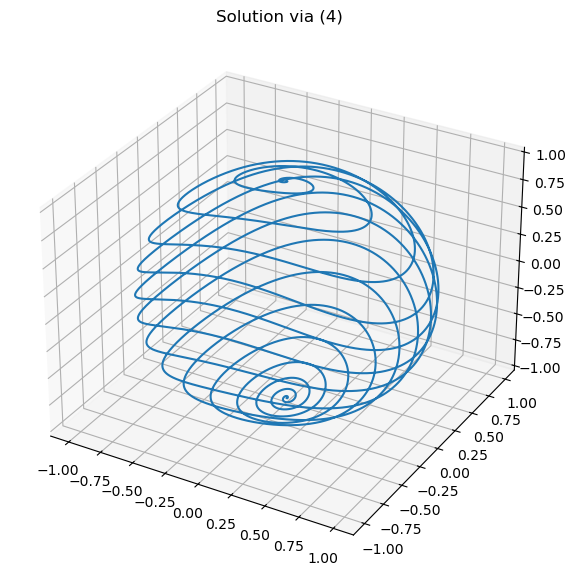

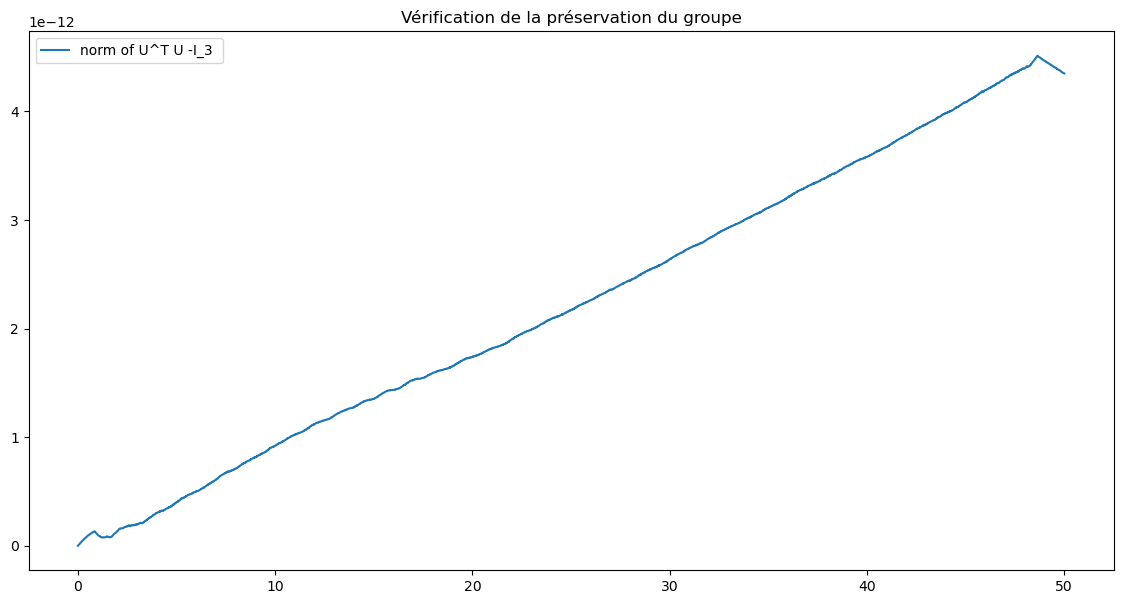

In [13]:
I=np.eye(3)

def matrice_transition(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        A =(E*Omega_z+delta*u(t)*Omega_x)*dt/2
        sol[j+1]= np.dot(np.dot(I+A,np.linalg.inv(I-A)),sol[j])
    return temps,sol

temps,sol_mat_trans = matrice_transition(0,T,E,dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot((sol_mat_trans@psi_0)[:,0],(sol_mat_trans@psi_0)[:,1],(sol_mat_trans@psi_0)[:,2])
ax.set_title('Solution via (4)')

fig, ax = plt.subplots()
ax.plot(temps, np.linalg.norm(np.einsum('nij,nkj-> nik',sol_mat_trans,sol_mat_trans)-I,axis=(1,2)),label='norm of U^T U -I_3 ')
ax.legend()
ax.set_title('Vérification de la préservation du groupe')

print(f"Valeur finale de psi : {sol_mat_trans[-1]@psi_0}")
print(np.linalg.norm(np.array([0,0,1])-sol_mat_trans[-1]@psi_0,ord=2))

Ce deuxième graphe montre bien que U reste une matrice othogonale, à l'erreur de précision machine près.


**Vocabulaire // ouverture mathématique**


$SO_3$ est à la fois un groupe et une variété différentielle (avec une structure compatible avec les lois du groupe), c'est ce que l'on appelle un **groupe de Lie**. Les matrices $\Omega_x,\Omega_y,\Omega_z$ jouent un rôle particulier et forment ce que l'on appelle (les générateurs de) l'**Algèbre de Lie** du groupe.

Par ailleurs, le schéma proposé dans l'équation (4) est à la fois relié à la **transformation de Cayley** d'une matrice unitaire, et à une famille de schémas que l'on nomme **approximations de Padé**.




## BONUS : Parallélisation de la simulation de systèmes linéaires

**Question 5** On suppose que l'on dispose de $N$ processeurs. Expliquer comment exploiter le calcul de la matrice de transition de la question précédente pour résoudre l'équation (2) de manière parallèle. Commenter le gain (ou non) en terme de temps d'exécution. 

→ L'interet de l'opérateur de flot est qu'il peut se généraliser pour passer de $t_1$ à un temps $t_2$ on le note $U(t_1,t_2)$
on a toujours $U(t_1,t_1) = I_n$ donc si on dispose de 2 processeurs par exemple on peut ainsi calculer séparément sur les deux procésseurs grâce à la méthode précédente  $U(0,t)$ pour $t \in [0,T/2]$ et $U(T/2,t)$ pour $t \in [T/2,T]$, on a ensuite directement $\psi(T)$ en multipliant $\psi_0$ par $U(0,T/2)$ puis  $\psi(T/2)$ par $U(T/2,T)$

Avec n procésseurs il suffit de diviser l'interval de temps T en n intervalles $[t_k,t_{k+1}]$ où $t_k = kT/n$

et on calcule les $U(t_k,t_{k+1})$ en les répartissant sur les n procésseurs

enfin $U(T)=U(t_{n-1},T)...U(t_{1},t_{2})U(0,t_{1})\psi_0$

On divise par n la compléxité par rapport au shéma conventionnel mais le produit matriciel final se fait en complexité $log_2(n)$ si on répartit les opérations matriciel par pairs sur les diférents procésseurs


**Vocabulaire // ouverture mathématique**

Lorsque l'équation n'est pas linéaire, paralléliser en temps la résolution d'une équation différentielle est un sujet difficile. Il est possible d'utiliser des méthodes  de type **Parareal**.

---